In [1]:
# Install pip packages in the current Jupyter kernel

import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib==3.0.3
# !{sys.executable} -m pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"D:\heeju\특화 프로젝트\DataAnalysis\DataSet") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df=pd.read_csv("서울시 상권분석서비스(길단위인구-상권).csv",encoding='euc-kr') 
df.head()

# 데이터 shape 파악
df.shape

(20706, 27)

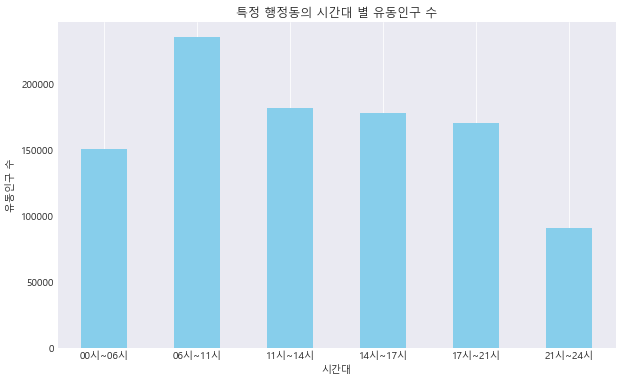

In [2]:
# 특정 행정동 코드 설정
target_dong_code = 3110014

# 특정 행정동에 해당하는 데이터 필터링
target_dong_data = df[df["상권_코드"] == target_dong_code]

# 시간대 별 유동인구 수 추출
time_columns = ["시간대_00_06_유동인구_수", "시간대_06_11_유동인구_수", "시간대_11_14_유동인구_수", 
                "시간대_14_17_유동인구_수", "시간대_17_21_유동인구_수", "시간대_21_24_유동인구_수"]
time_data = target_dong_data[time_columns].sum()

# 시간대 라벨 수정
time_labels = [f'{time[4:6]}시~{time[-9:-7]}시' for time in time_columns]

# 그래프 그리기
plt.figure(figsize=(10, 6))
time_data.plot(kind='bar', color='skyblue')
plt.title('특정 행정동의 시간대 별 유동인구 수')
plt.xlabel('시간대')
plt.ylabel('유동인구 수')
plt.xticks(range(len(time_labels)), time_labels, rotation=0)
plt.grid(axis='y')
plt.show()

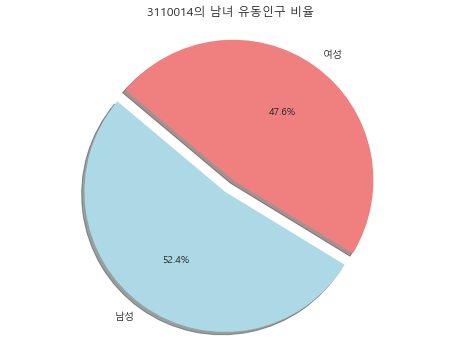

In [3]:
# 특정 행정동 코드 설정
target_dong_code = 3110014

# 선택한 행정동 코드에 해당하는 데이터 필터링
target_dong_data = df[df["상권_코드"] == target_dong_code]

# 남성과 여성의 총 유동인구 수 계산
total_male_population = target_dong_data["남성_유동인구_수"].sum()
total_female_population = target_dong_data["여성_유동인구_수"].sum()

# 원 그래프 시각화
labels = ['남성', '여성']
sizes = [total_male_population, total_female_population]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # 파이 차트에서 남성 부분을 조금 떼어내기 위한 설정

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title(f'{target_dong_code}의 남녀 유동인구 비율')
plt.axis('equal')  # 원의 형태를 유지함
plt.show()

In [4]:
# 선택한 행정동 코드에 해당하는 데이터 필터링
target_dong_data = df[df["상권_코드"] == 3110014  & (df["기준_년분기_코드"] == 20221 |  df["기준_년분기_코드"] == 20222 |  df["기준_년분기_코드"] == 20223 |  df["기준_년분기_코드"] == 20224) ]  # 선택한 동 코드에 맞게 수정

# 시간대 별 유동인구 수 계산
time_columns = ["시간대_00_06_유동인구_수", "시간대_06_11_유동인구_수", "시간대_11_14_유동인구_수", 
                "시간대_14_17_유동인구_수", "시간대_17_21_유동인구_수", "시간대_21_24_유동인구_수"]
time_data = target_dong_data.groupby("기준_년분기_코드")[time_columns].sum()

# 그래프 그리기
plt.figure(figsize=(50, 25))
time_data.plot(marker='o', linestyle='-')

# x 축에 표시할 년분기 선택 (예: 2년마다)
xticks = time_data.index[::1]

plt.title(f'기준 년분기별 {dong_code}의 시간대 별 유동인구 수')
plt.ylabel('유동인구 수')
plt.xlabel('기준 년분기')
plt.xticks(xticks, rotation=45)
plt.tight_layout()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

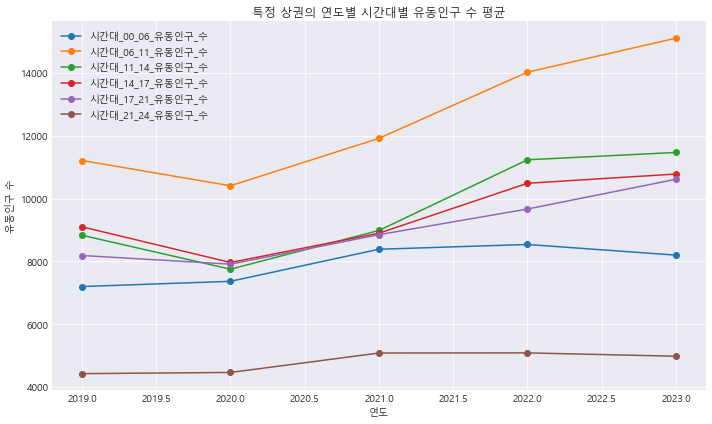

In [ ]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 특정 상권코드의 데이터만 필터링
target_market_data = df[df['상권_코드'] == 3110014]

# 연도와 분기를 추출하여 새로운 열 만들기
target_market_data['Year'] = target_market_data['기준_년분기_코드'].dt.year

# 시간대별 컬럼명 리스트
time_columns = ['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수',
                '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']

# 연도를 기준으로 시간대별 유동인구 수 계산
yearly_data = target_market_data.groupby(['Year']).mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
for column in time_columns:
    plt.plot(yearly_data.index, yearly_data[column], marker='o', label=column)

plt.title('특정 상권의 연도별 시간대별 유동인구 수 평균')
plt.xlabel('연도')
plt.ylabel('유동인구 수')
plt.legend()
plt.tight_layout()
plt.show()

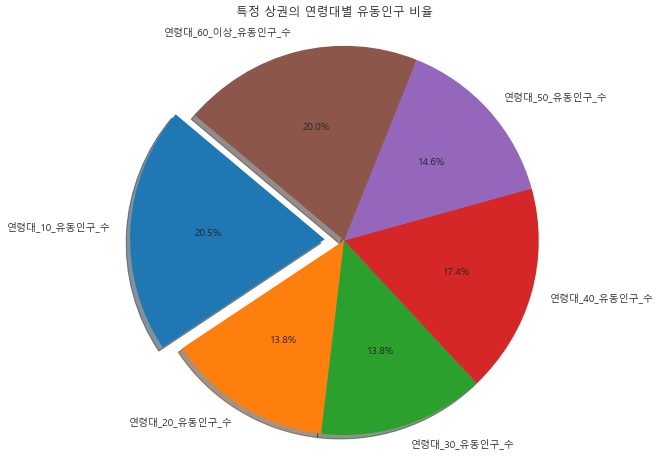

In [ ]:
# 특정 상권코드의 데이터만 필터링
target_market_data = df[df['상권_코드'] == 3110014]

# 연령대별 유동인구 수 계산
age_columns = ['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수',
               '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']
total_population = target_market_data[age_columns].sum(axis=1)

# 각 연령대의 상대적 비율 계산
age_ratios = target_market_data[age_columns].div(total_population, axis=0)

# 파이 차트 그리기
labels = age_ratios.columns  # 연령대 라벨
sizes = age_ratios.mean()  # 각 연령대의 평균 비율
explode = (0.1, 0, 0, 0, 0, 0)  # 특정 연령대 강조 설정

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # 원형 모양으로 설정
plt.title('특정 상권의 연령대별 유동인구 비율')
plt.show()

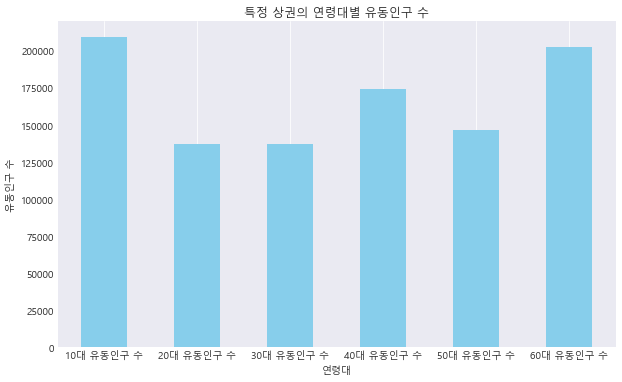

In [ ]:
# 특정 상권코드의 데이터만 필터링
target_market_data = df[df['상권_코드'] == 3110014]

# 연령대별 유동인구 수 계산
age_columns = ['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수',
               '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']
total_population = target_market_data[age_columns].sum()

# 시간대 라벨 수정
age_labels = [f'{age[4:6]}대 유동인구 수' for age in age_columns]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
total_population.plot(kind='bar', color='skyblue')
plt.title('특정 상권의 연령대별 유동인구 수')
plt.xlabel('연령대')
plt.ylabel('유동인구 수')
plt.xticks(range(len(age_labels)), age_labels, rotation=0)
plt.grid(axis='y')
plt.show()

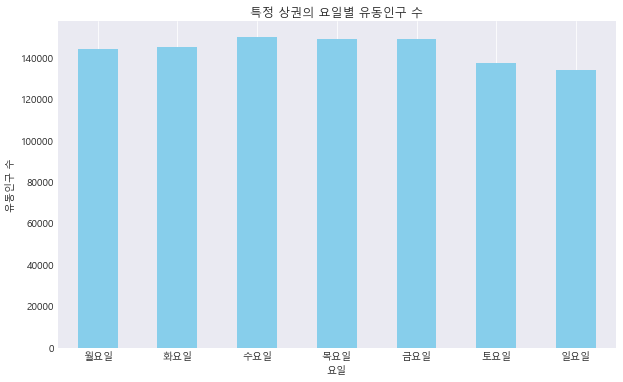

In [ ]:
# 특정 상권코드의 데이터만 필터링
target_market_data = df[df['상권_코드'] == 3110014]

# 요일별 유동인구 수 계산
weekday_columns = ['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수',
                   '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수']
total_population = target_market_data[weekday_columns].sum()

# 시간대 라벨 수정
weekday_labels = [f'{weekday[0:3]}' for weekday in weekday_columns]

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
total_population.plot(kind='bar', color='skyblue')
plt.title('특정 상권의 요일별 유동인구 수')
plt.xlabel('요일')
plt.ylabel('유동인구 수')
plt.xticks(range(len(weekday_labels)), weekday_labels, rotation=0)
plt.grid(axis='y')
plt.show()